In [1]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'


In [4]:
import pandas as pd

boston_df = pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## For the "Median value of owner-occupied homes" provide a boxplot

[Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 0, 'Boxplot'),
 Text(0.5, 1.0, 'Boxplot for Median value of owner-occupied homes')]

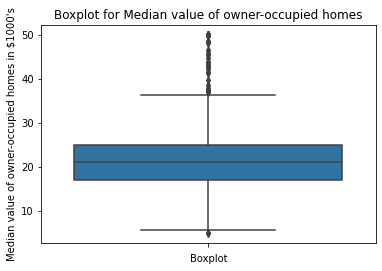

In [5]:
import seaborn as sns

box = sns.boxplot(y = 'MEDV', data = boston_df)
box.set(ylabel = "Median value of owner-occupied homes in $1000's"
        , xlabel = "Boxplot"
        , title = "Boxplot for Median value of owner-occupied homes")

## Provide a  bar plot for the Charles river variable

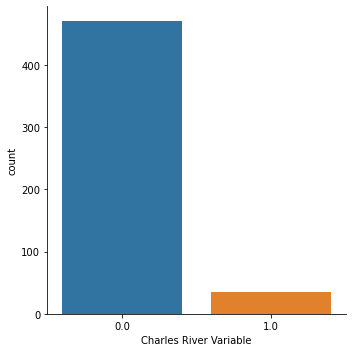

In [15]:
import matplotlib.pyplot as plt

sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.xlabel("Charles River Variable");

## Discretize the AGE column into three groups for analysis.

[Text(0.5, 0, 'Proportion of owner-occupied units built prior to 1940'),
 Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable.')]

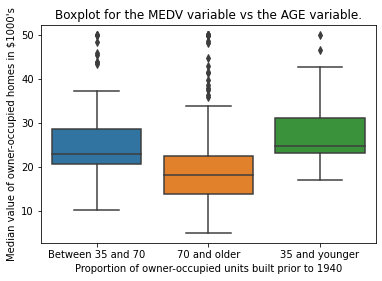

In [6]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

boxplot = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
boxplot.set(xlabel = "Proportion of owner-occupied units built prior to 1940"
           , ylabel = "Median value of owner-occupied homes in $1000's"
           , title = "Boxplot for the MEDV variable vs the AGE variable.")

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

[Text(0, 0.5, 'Nitric Oxides concentration (parts per 10 million)'),
 Text(0.5, 0, 'Proportion of non-retail business acres per town.'),
 Text(0.5, 1.0, 'Scatter Plot between NOX and INDUS')]

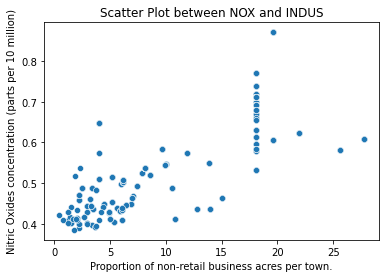

In [7]:
scatter = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
scatter.set(ylabel = "Nitric Oxides concentration (parts per 10 million)"
            , xlabel = "Proportion of non-retail business acres per town."
           , title = "Scatter Plot between NOX and INDUS")

### The Scatter Plot shows that there is a high correlation or positive correlation between the Nitric Oxides concentration (parts per 10 million) and Proportion of non-retail business acres per town as there is a near linear relationship between both of them.

## Create a histogram for the pupil to teacher ratio variable

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Pupil-Teacher ratio by town'),
 Text(0, 0.5, 'Frequency of Pupil-Teacher ratio by town'),
 Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')]

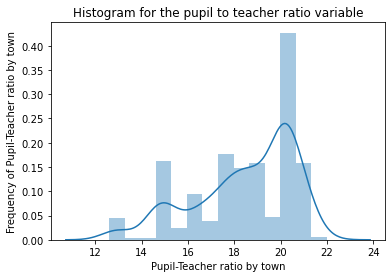

In [8]:
histplot = sns.distplot(boston_df['PTRATIO'])
histplot.set(xlabel = "Pupil-Teacher ratio by town"
             , ylabel = "Frequency of Pupil-Teacher ratio by town"
            , title = "Histogram for the pupil to teacher ratio variable")

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [10]:
import scipy.stats
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,
                     boston_df[boston_df.CHAS == 0].MEDV)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

### Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is no significance difference in median value of houses bounded by Charles river and not.

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [11]:
boston_df.loc[(boston_df.AGE > 81), 'age_span'] = 'before 1940'
boston_df.loc[(boston_df.AGE <= 81), 'age_span'] = 'after 1940'
scipy.stats.levene(boston_df[boston_df.age_span=='before 1940']['MEDV'],
                  boston_df[boston_df.age_span=='after 1940']['MEDV'],
                  center='mean')

LeveneResult(statistic=1.587082228964904, pvalue=0.2083265383143275)

### Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis that there is a statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [12]:
scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

(0.7636514469209151, 7.913361061238693e-98)

### Conclusion: Since the p-value is greater than 0.05, we can reject the null hypothesis that there is no relationship between the nitric acid concentration and the proportion of non-retail business acres per town. And as the r value is positive and close to zero, we can conclude that there is a almost strong relationship between these two variables and the relationship curve will be positively sloping.

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [13]:
import statsmodels.api as sm

X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        07:50:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion: There is an additional impact of 1.0916 of weighted distance to the five Boston employment centres on the median value of owner occupied homes.